# Comparando histogramas de amostras

## importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns

AMOSTRAS_POR_CLASSE = 3

PATHS = {'sem_otsu':'./csvs/lbp_toras.csv',
         'com_otsu':'./csvs/otsu_lbp_toras.csv'}

TARGET_NAMES = {'broca': 0, 'fissura': 1,
                'musgo': 2, 'quebra': 3}

sns.set_style('darkgrid')

          57       58      file
0    21203.0  35941.0  sem_otsu
1    19367.0  34279.0  sem_otsu
2    19651.0  34041.0  sem_otsu
3     4404.0   7931.0  sem_otsu
4     2218.0   4040.0  sem_otsu
5     2081.0   3759.0  sem_otsu
6     7624.0  12036.0  sem_otsu
7     6896.0  11340.0  sem_otsu
8     7241.0  11440.0  sem_otsu
9     6630.0   9391.0  sem_otsu
10    6673.0   9665.0  sem_otsu
11    5319.0   8187.0  sem_otsu
12  246617.0   9016.0  com_otsu
13  208973.0  13000.0  com_otsu
14  225070.0   9771.0  com_otsu
15   54797.0    855.0  com_otsu
16   24479.0   1002.0  com_otsu
17   24413.0    778.0  com_otsu
18   78927.0   1435.0  com_otsu
19   80924.0   1013.0  com_otsu
20   77759.0   1725.0  com_otsu
21   60917.0   1661.0  com_otsu
22   64177.0   1198.0  com_otsu
23   58421.0    644.0  com_otsu


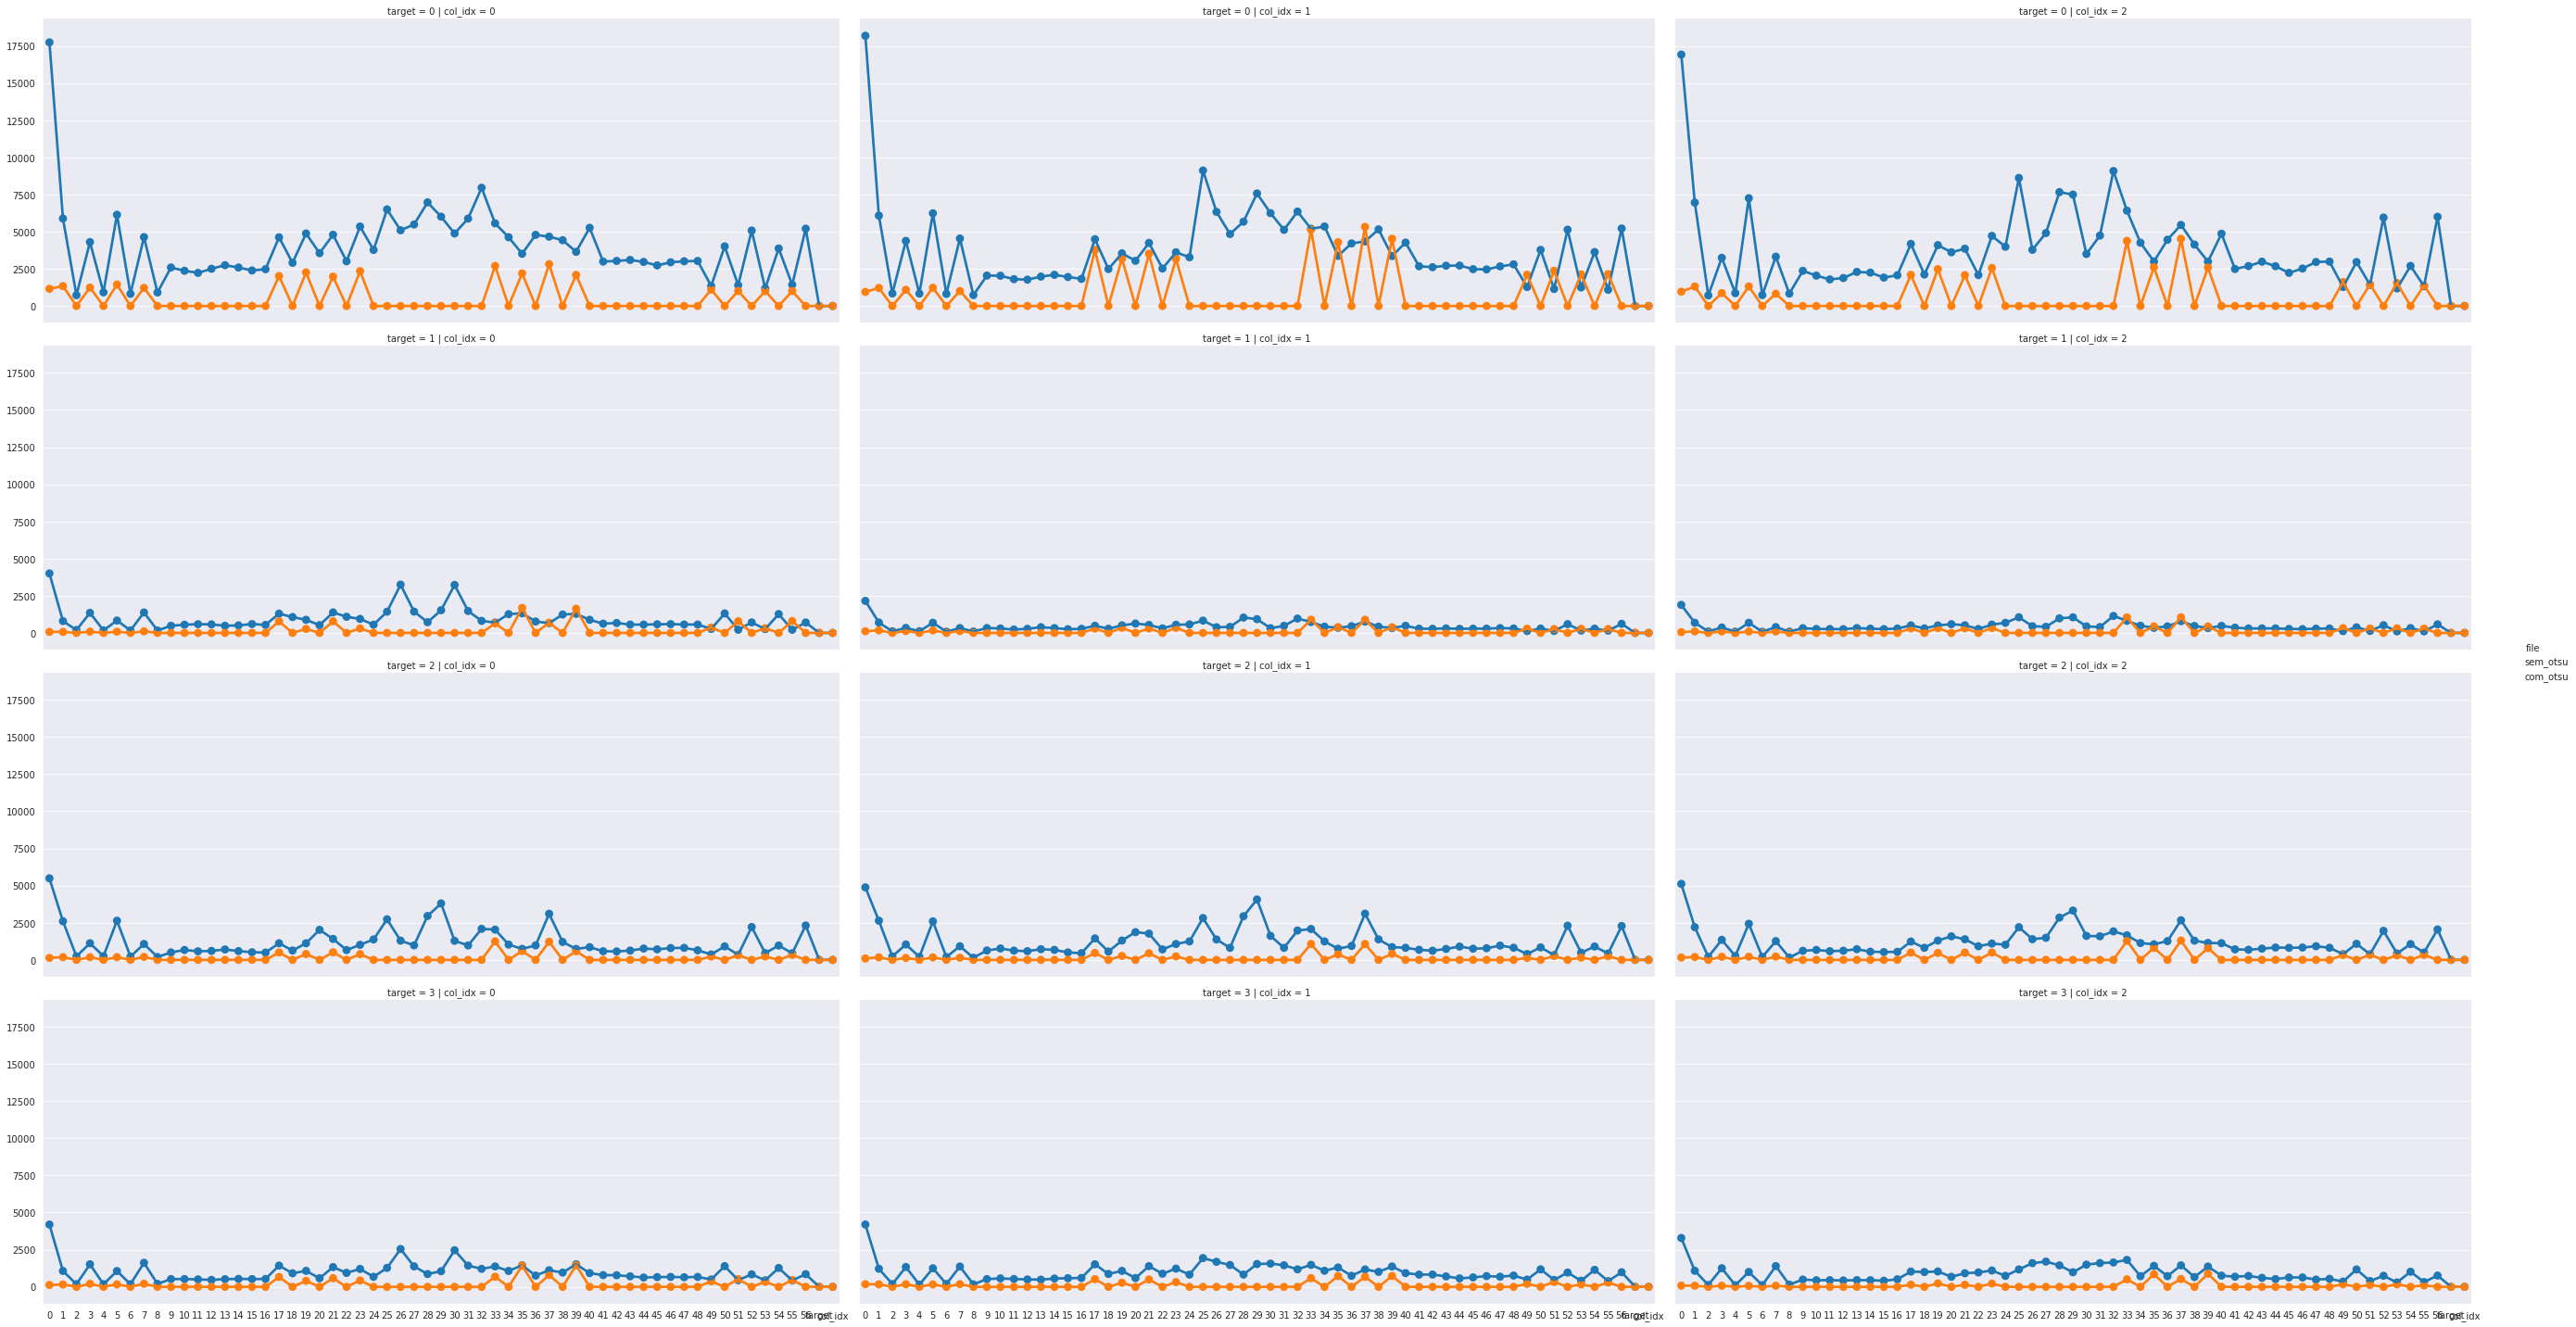

In [2]:
df_list = []
for path in PATHS:
  for target, df in pd.read_csv(PATHS[path], index_col=0).groupby('target'):
    temp_df = df.head(AMOSTRAS_POR_CLASSE).copy()
    temp_df['file'] = path
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)

df['col_idx'] = [i % AMOSTRAS_POR_CLASSE for i in range(len(df))]

df_out = pd.concat(
  [df.pop('57'), df.pop('58')],
  ignore_index=True,
  axis='columns')

df_out.columns = ['57', '58']
df_out['file'] = df['file']
print(df_out)

g = sns.FacetGrid(
  data=df,
  col='col_idx',
  row='target',
  hue='file',
  height=5,
  aspect=2.5
)

g.map_dataframe(sns.pointplot)
g.add_legend()

None

## Comparando amostras após LBP com formas de normalização diferentes

- **azul**: pelo produto das dimensões da imagem;
- **laranja**: pelo maior elemento do histograma;
- **verde**: pelo somatório do histograma (GLCM).

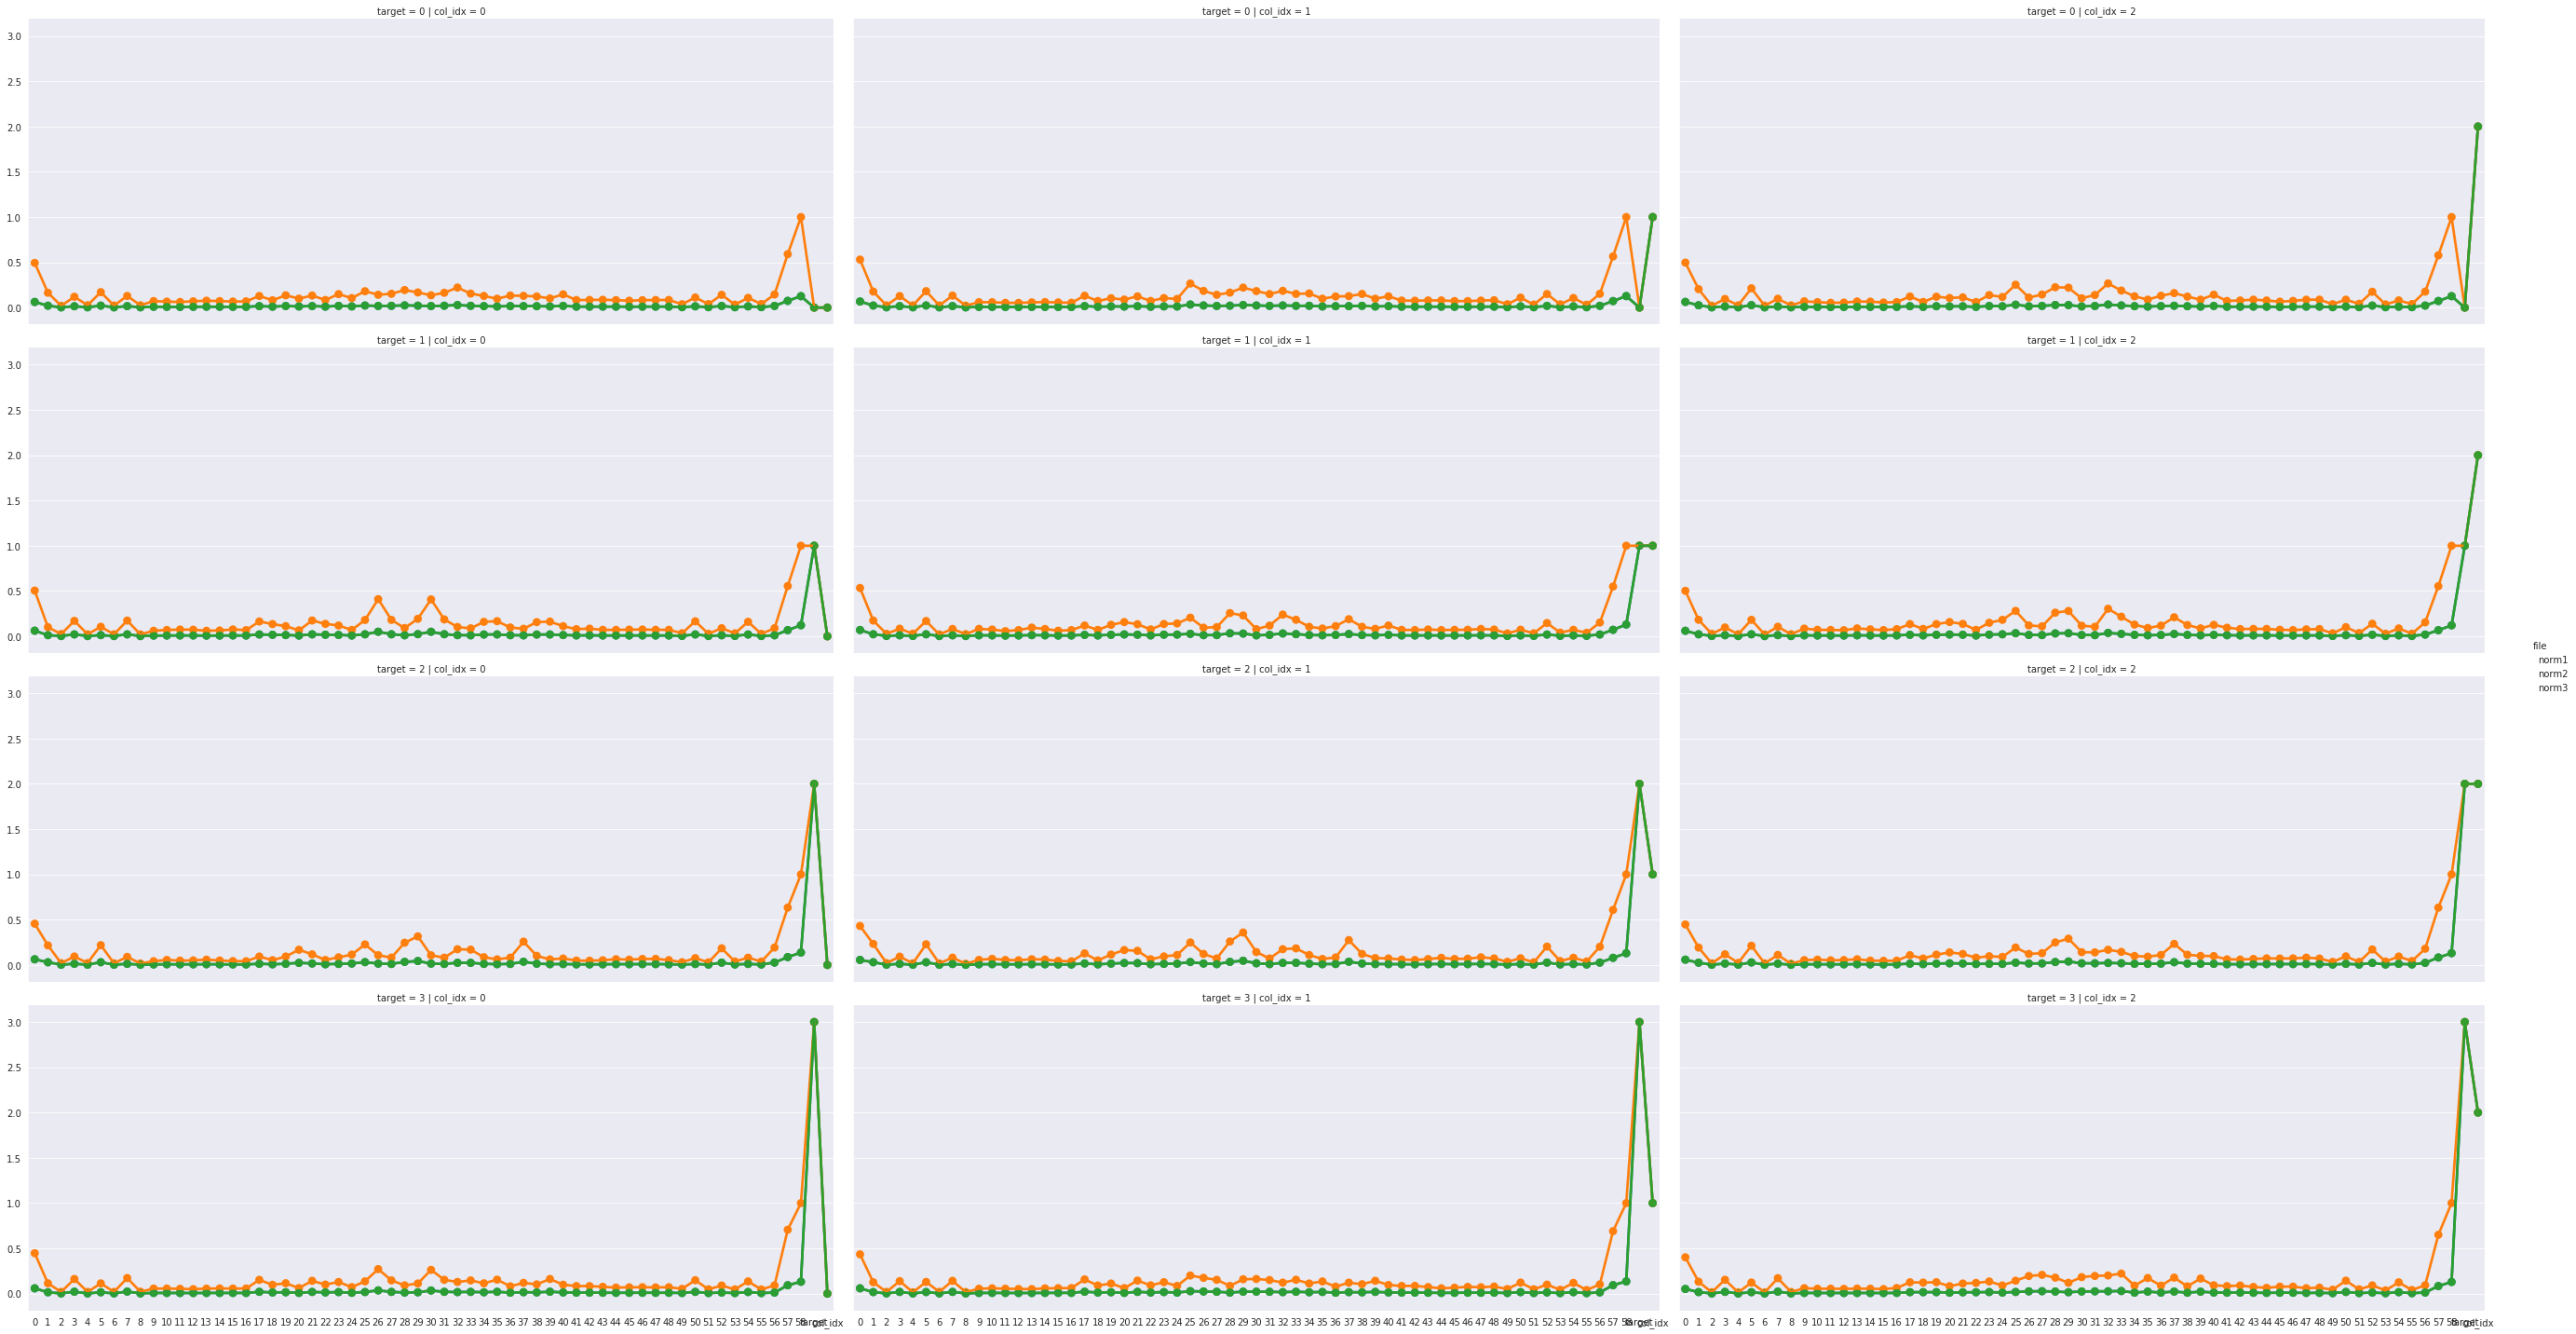

In [3]:
PATHS_2 = {'norm1':'./csvs/lbp_norm1_toras.csv',
           'norm2':'./csvs/lbp_norm2_toras.csv',
           'norm3':'./csvs/lbp_norm3_toras.csv'}

df_list = []
for path in PATHS_2:
  for target, df in pd.read_csv(PATHS_2[path], index_col=0).groupby('target'):
    temp_df = df.head(AMOSTRAS_POR_CLASSE).copy()
    temp_df['file'] = path
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)

df['col_idx'] = [i % AMOSTRAS_POR_CLASSE for i in range(len(df))]

g = sns.FacetGrid(
  data=df,
  col='col_idx',
  row='target',
  hue='file',
  height=5,
  aspect=2.5
)

g.map_dataframe(sns.pointplot)
g.add_legend()

None

## comparando amostras após OTSU e LBP com diferentes formas de normalização

- **azul**: pelo produto das dimensões da imagem;
- **laranja**: pelo maior elemento do histograma;
- **verde**: pelo somatório do histograma (GLCM).

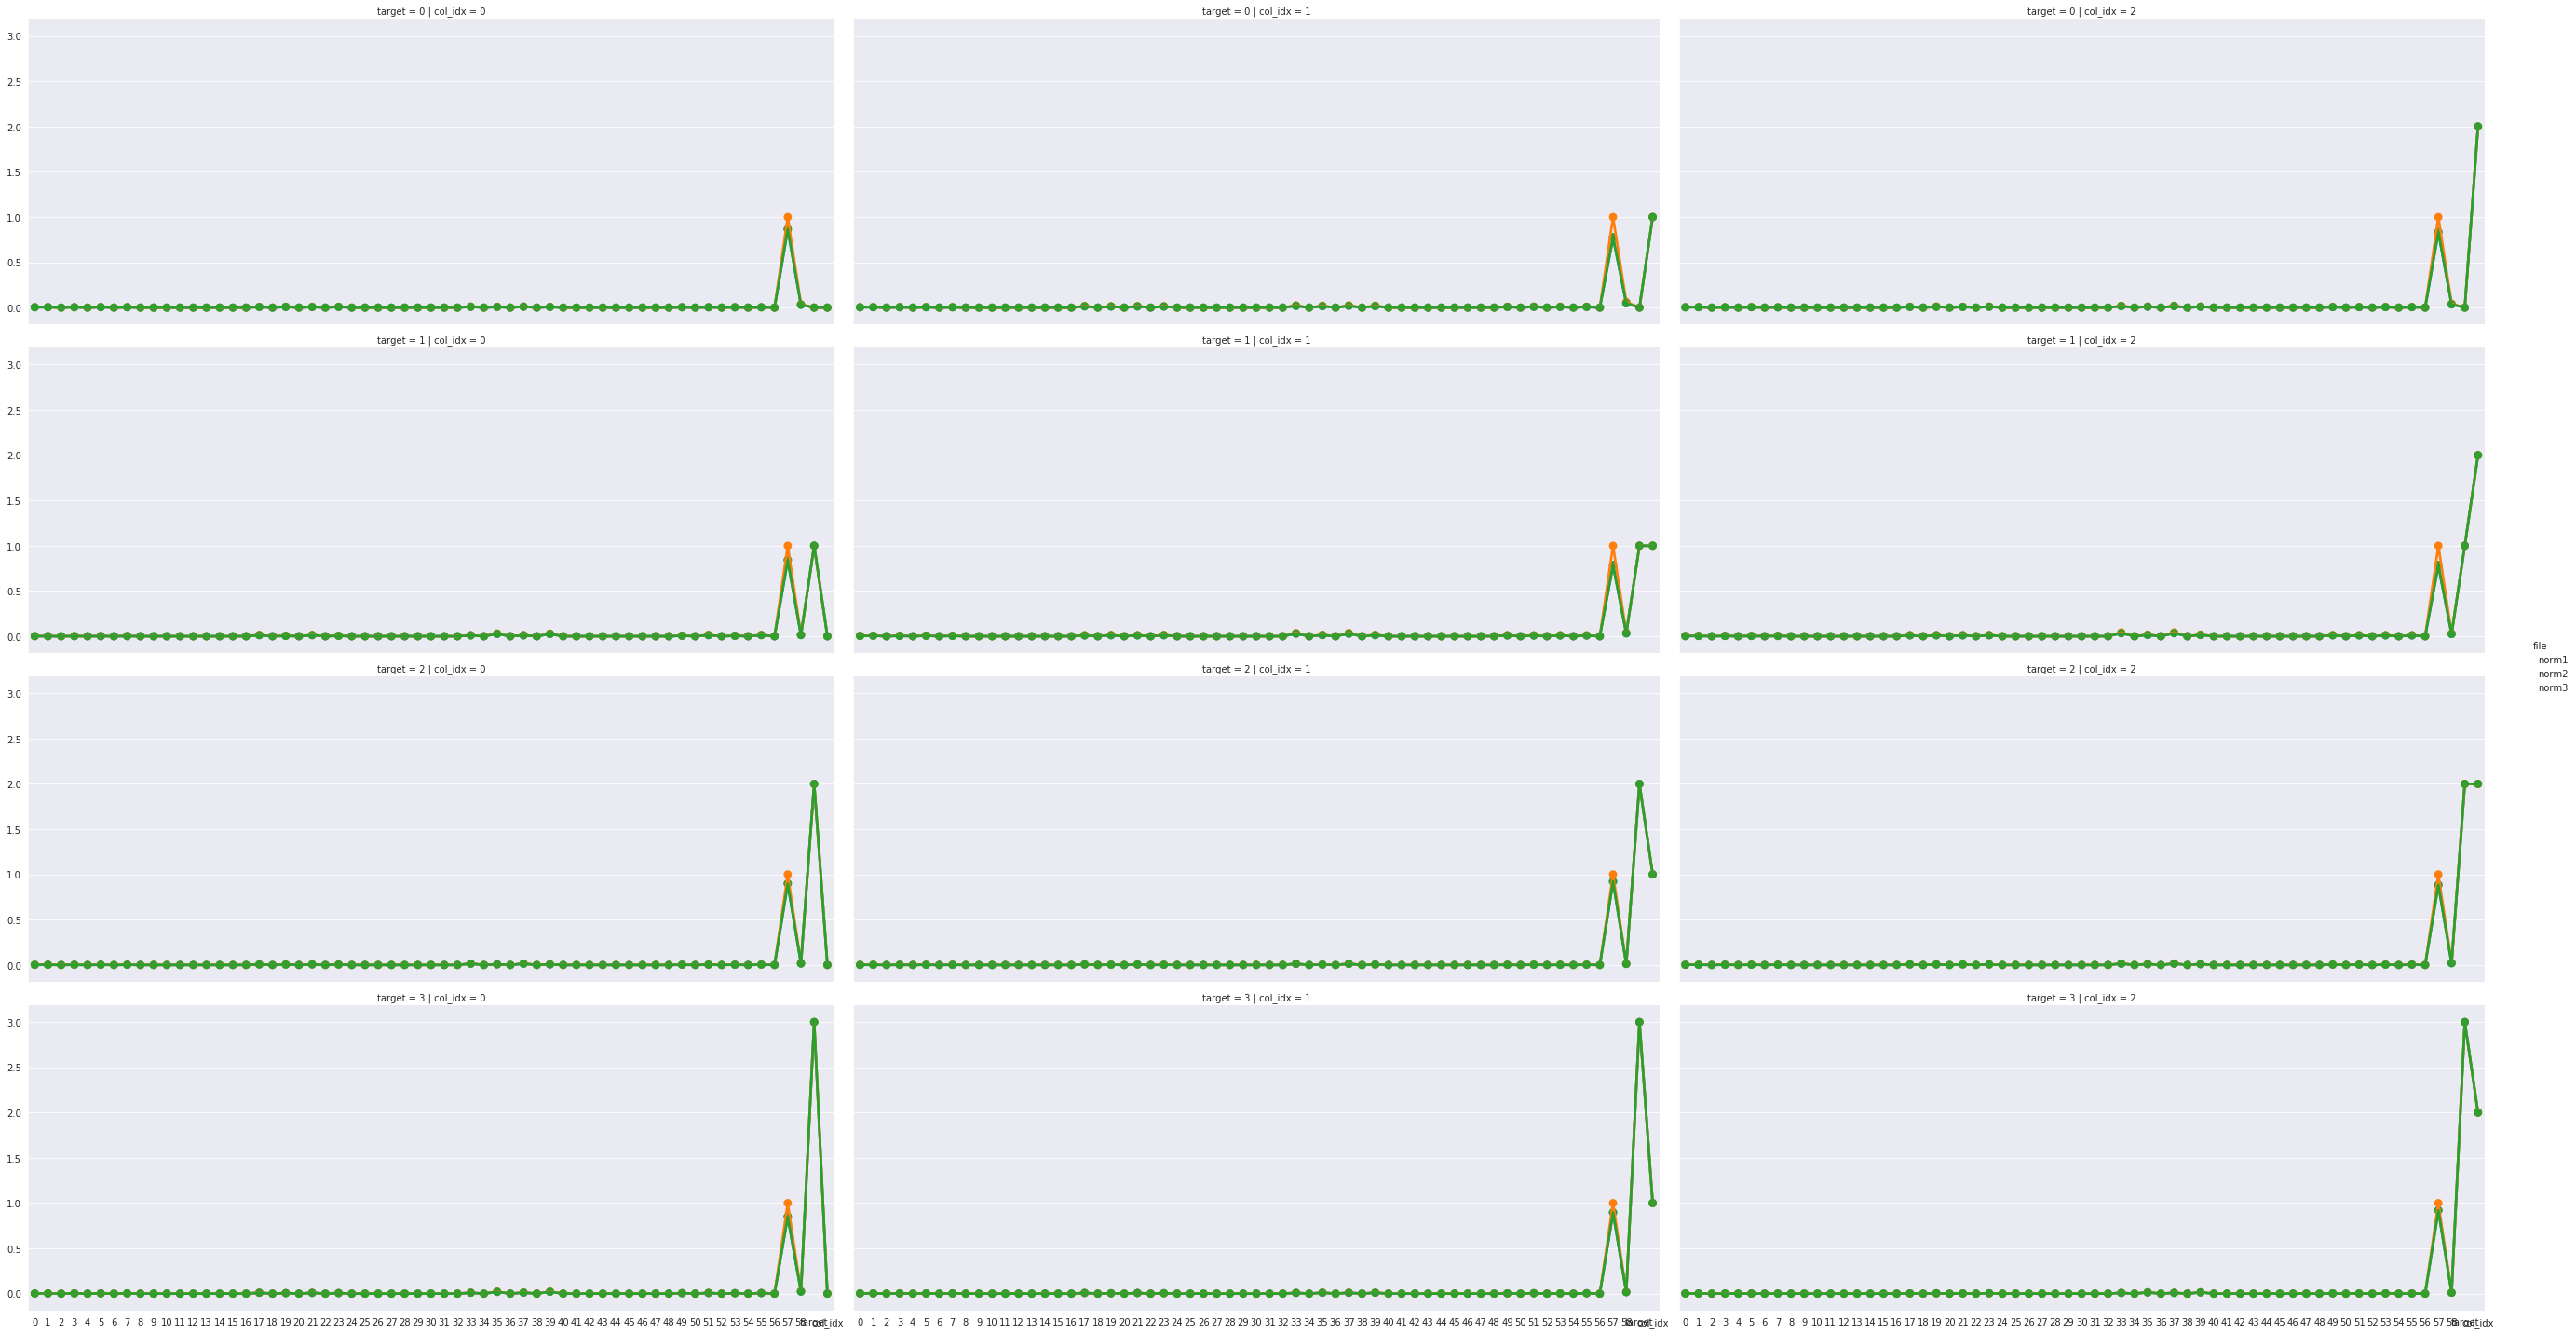

In [4]:
PATHS_3 = {'norm1':'./csvs/otsu_lbp_norm1_toras.csv',
           'norm2':'./csvs/otsu_lbp_norm2_toras.csv',
           'norm3':'./csvs/otsu_lbp_norm3_toras.csv'}

df_list = []
for path in PATHS_3:
  for target, df in pd.read_csv(PATHS_3[path], index_col=0).groupby('target'):
    temp_df = df.head(AMOSTRAS_POR_CLASSE).copy()
    temp_df['file'] = path
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)

df['col_idx'] = [i % AMOSTRAS_POR_CLASSE for i in range(len(df))]

g = sns.FacetGrid(
  data=df,
  col='col_idx',
  row='target',
  hue='file',
  height=5,
  aspect=2.5
)

g.map_dataframe(sns.pointplot)
g.add_legend()

None